# Airline Passenger Satisfaction Prediction 

## Problem Statement

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Based on given dataset we have to predict passenger if the passenger is satisfied with the airline sevices he got through his journey ?

# Dataset Information
 This dataset contains 25 columns.
 
 Kaggle link to download dataset : https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv
 
(Dataset has seperte train and test csv files. I have concatenated them and used whole dataset as raw dataset for the purpose of EDA. Also removed unnamed and id column while concatinating.)
 
Column info as follows: 

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [99]:
train = pd.read_csv("F:/Machine_Learning/Intern/Airline_passenger_data/train.csv")

In [100]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [101]:
train.shape

(103904, 25)

In [102]:
test = pd.read_csv("F:/Machine_Learning/Intern/Airline_passenger_data/test.csv")

In [103]:
test.shape

(25976, 25)

In [104]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [105]:
airline_dataset = pd.concat([train,test])

In [106]:
airline_dataset.shape

(129880, 25)

In [107]:
airline_dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [108]:
airline_dataset.drop(['Unnamed: 0', 'id'], axis=1, inplace = True)

In [109]:
df =airline_dataset

In [110]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# EDA (Exploratory Data Analysis)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure_Arrival_time_convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [42]:
df.shape   # Getting shape of train data

(129880, 23)

In [43]:
#Finding if there are any null values in columns
print(pd.isnull(df).sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure_Arrival_time_convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [44]:
# Calculating the Missing Values % contribution in Data

df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure_Arrival_time_convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.3
satisfaction                         0.0
dtype: float64

### Here we can see that Train data has 393 missing value in Arrival Delay in Minutes
### As here the missing values are very less ,0.3 % compare to  dataset so we will drop the missing values

In [45]:
# dropping the missing value rows as it's in less amount(0.3%)
df= df.dropna()
df.shape

(129487, 23)

In [46]:
#To check Null values again
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure_Arrival_time_convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

In [47]:
# checking for duplicated values 
df.duplicated().sum()

0

In [48]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure_Arrival_time_convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [49]:
# Renaming columns from -->capital.loss to --> capital_loss format

df.columns = [c.replace(' ', '_') for c in df.columns]

In [50]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [51]:
df=df.rename(columns={"On-board_service": "On_board_service"})

In [52]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [53]:
# saprate catigorical and numerical features
catigorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns

In [54]:
catigorical_features

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction'], dtype='object')

In [55]:
numerical_features

Index(['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')

In [56]:
# Finding unique values in each categorical column
for i in catigorical_features:
    print(i,df[i].unique())
    print()
    print("------------------------------------------")
    print()

Gender ['Male' 'Female']

------------------------------------------

Customer_Type ['Loyal Customer' 'disloyal Customer']

------------------------------------------

Type_of_Travel ['Personal Travel' 'Business travel']

------------------------------------------

Class ['Eco Plus' 'Business' 'Eco']

------------------------------------------

satisfaction ['neutral or dissatisfied' 'satisfied']

------------------------------------------



In [57]:
df.describe()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Data Visualization

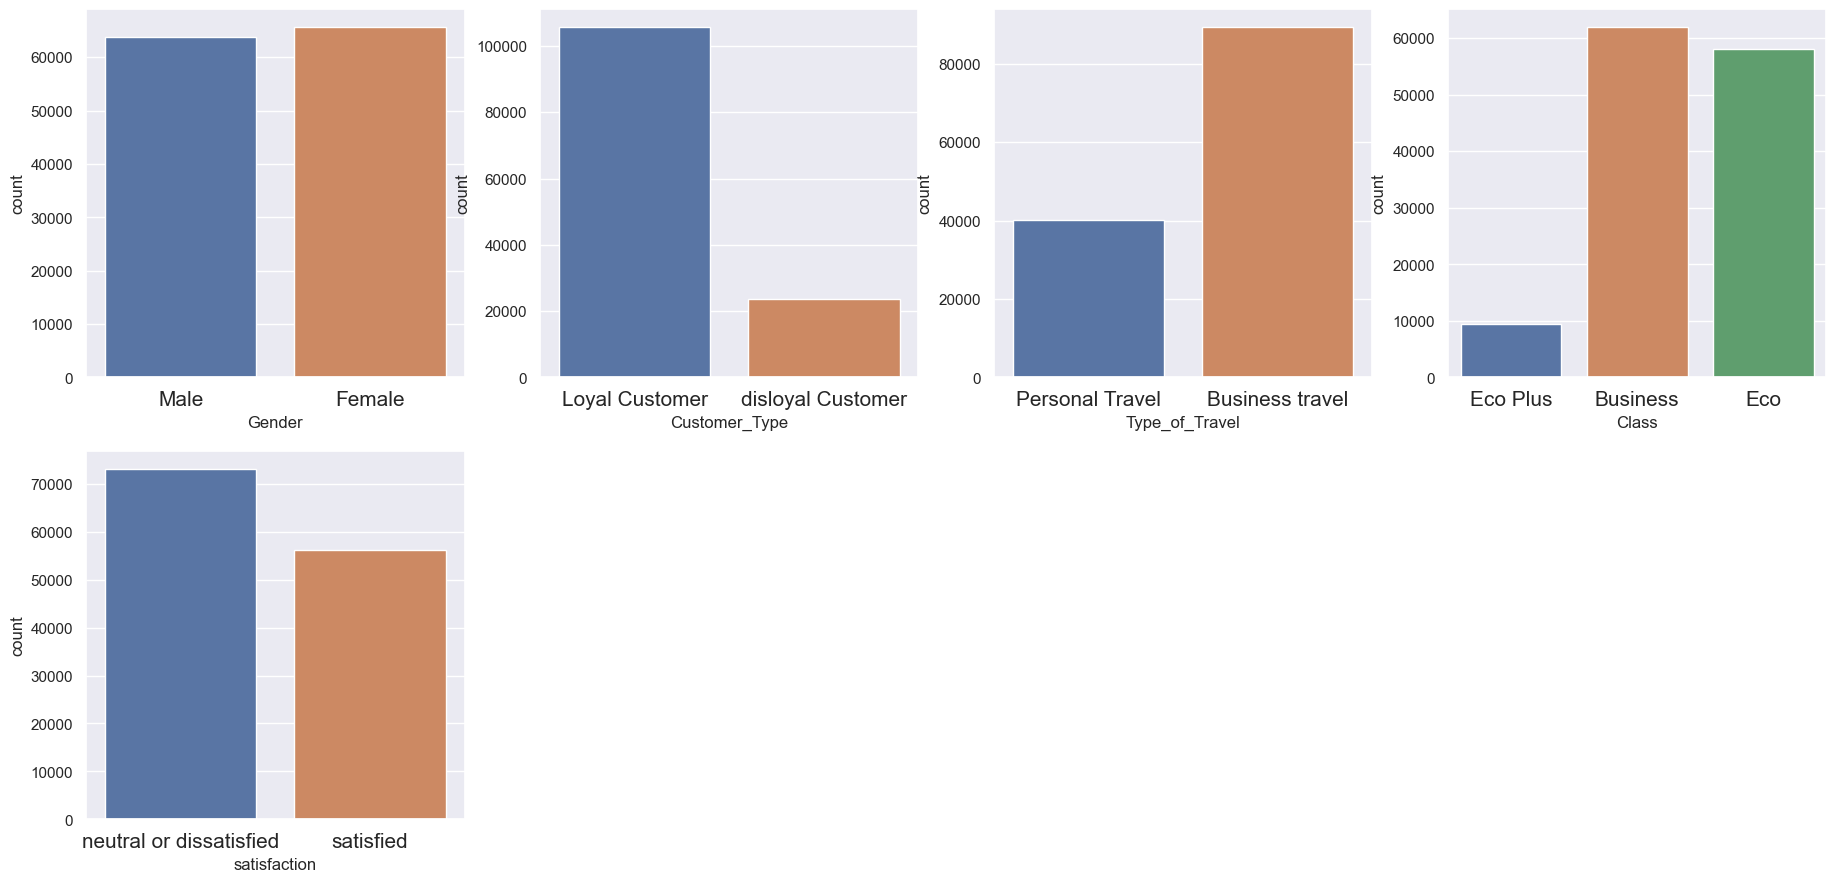

In [58]:
# For Categorical Features 

plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(20,10)})

for i in range(0,len(catigorical_features)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[catigorical_features[i]])
    plt.xticks(size=15)#,rotation=)
    

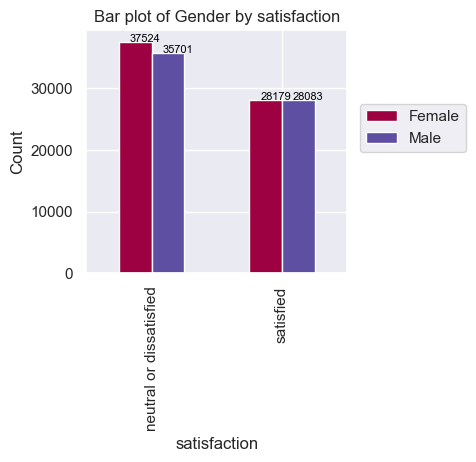

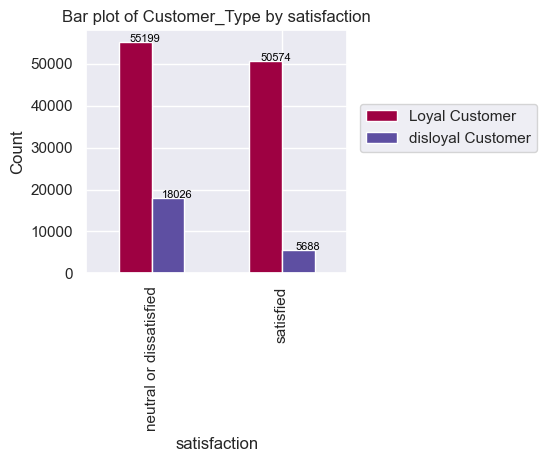

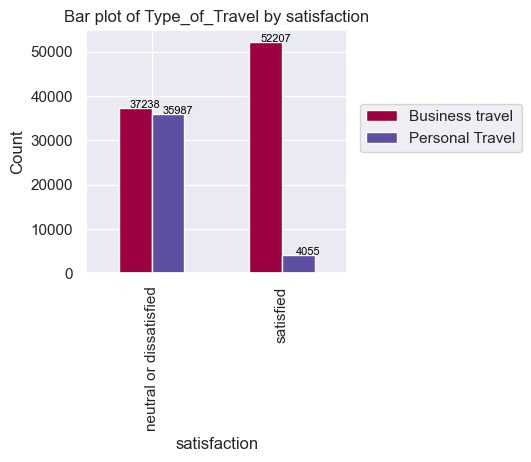

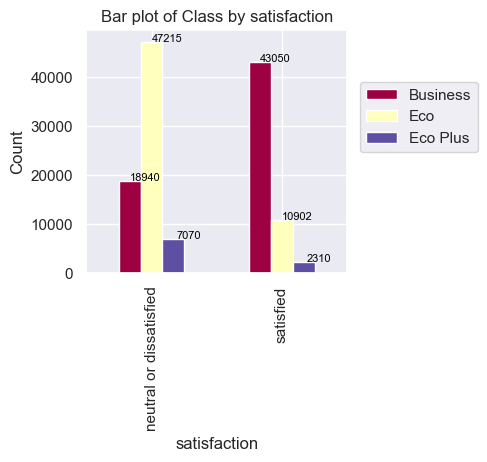

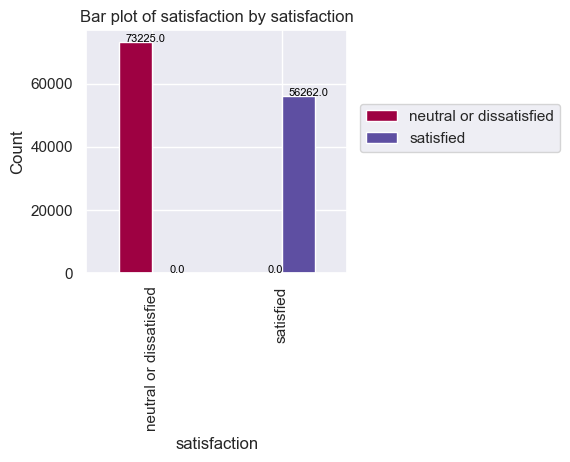

In [59]:
for col in catigorical_features:
    fig, ax = plt.subplots(figsize=(3, 3))
    counts = df.groupby(['satisfaction', col]).size().unstack()
    counts.plot( kind='bar', ax=ax, legend= False, cmap="Spectral" )
    ax.set_xlabel('satisfaction')
    ax.set_ylabel('Count')
    ax.set_title(f'Bar plot of {col} by satisfaction')
    ax.legend(loc=(1.05,0.5))
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=8, ha="center")
    plt.show()

In [60]:
def get_insights(data):
    for cols in catigorical_features[:-1]:
        cat_group = df.groupby(cols)['satisfaction'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        print('-'*70)
        print("Insights from '{}' data".format(cols))
        print('-'*70)
        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
        print('-'*70)

In [61]:
get_insights(df)

----------------------------------------------------------------------
Insights from 'Gender' data
----------------------------------------------------------------------
57.11 from Female are neutral or dissatisfied
55.97 from Male are neutral or dissatisfied
----------------------------------------------------------------------
----------------------------------------------------------------------
Insights from 'Customer_Type' data
----------------------------------------------------------------------
52.19 from Loyal Customer are neutral or dissatisfied
76.01 from disloyal Customer are neutral or dissatisfied
----------------------------------------------------------------------
----------------------------------------------------------------------
Insights from 'Type_of_Travel' data
----------------------------------------------------------------------
58.37 from Business travel are satisfied
89.87 from Personal Travel are neutral or dissatisfied
------------------------------------

# Feature Extraction

<AxesSubplot:>

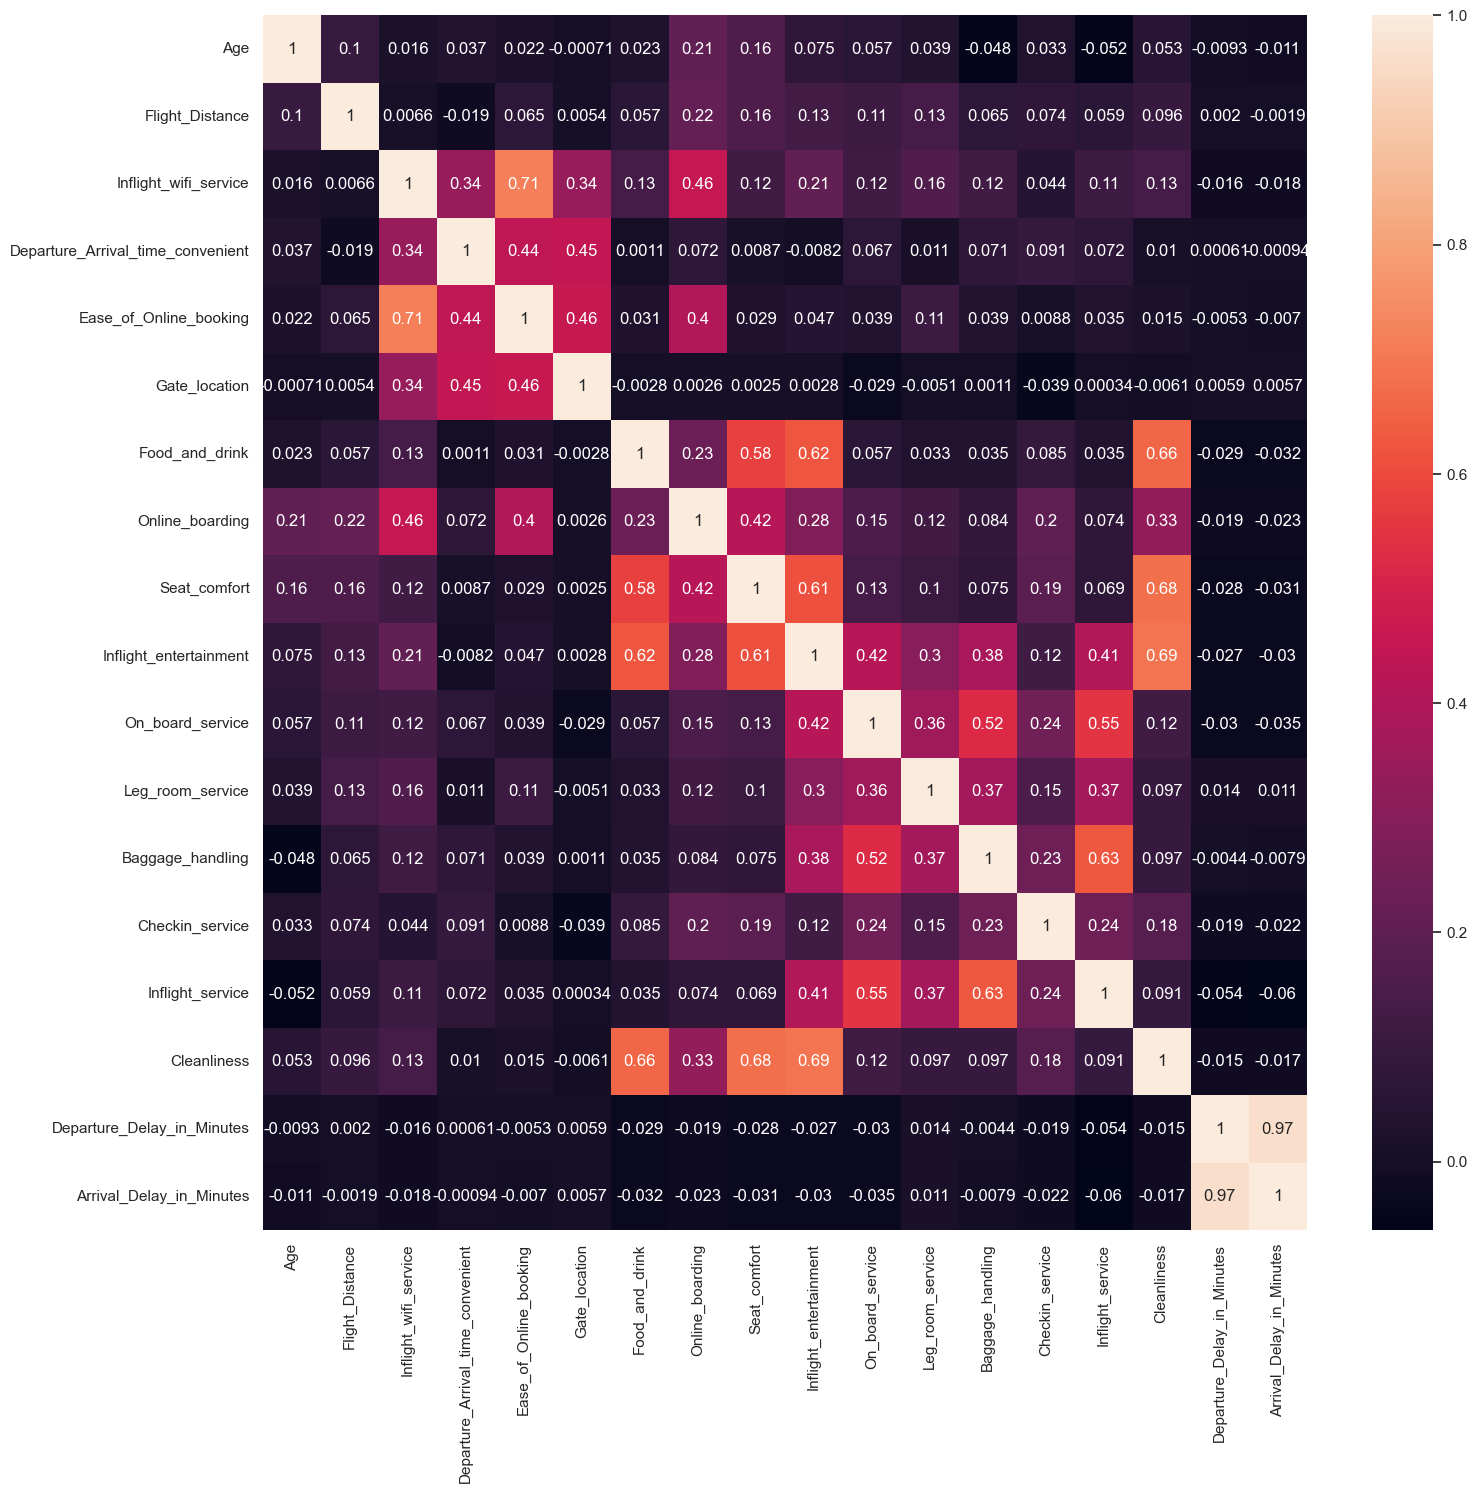

In [62]:
plt.rcParams['figure.figsize']=(15,15)
sns.heatmap(df.corr(), annot=True)

#### from above correlation Matrix we see that columns 'Departure Delay in Minutes', 'Arrival Delay in Minutes' are highly correlated with other columns so we remove those columns 

In [63]:
df.drop(['Arrival_Delay_in_Minutes'],axis=1,inplace=True)

In [64]:
numerical_features = df.select_dtypes(exclude="object").columns
numerical_features

Index(['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes'],
      dtype='object')

In [65]:
#!pip install statsmodels

In [66]:
#To check Multicolinearity

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract the numerical features from the DataFrame

numerical_features = df.select_dtypes(include=['int', 'float']).columns

# Create a new DataFrame with only the numerical features
df_numerical = df[numerical_features]

# Add a constant column to the numerical features
X = sm.add_constant(df_numerical)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

                              Feature        VIF
0                               const  38.154420
1                                 Age   1.096211
2                     Flight_Distance   1.095463
3               Inflight_wifi_service   2.386895
4   Departure_Arrival_time_convenient   1.438382
5              Ease_of_Online_booking   2.643522
6                       Gate_location   1.487598
7                      Food_and_drink   2.169491
8                     Online_boarding   1.877892
9                        Seat_comfort   2.379786
10             Inflight_entertainment   3.801987
11                   On_board_service   1.759124
12                   Leg_room_service   1.302721
13                   Baggage_handling   1.895560
14                    Checkin_service   1.214886
15                   Inflight_service   2.061368
16                        Cleanliness   2.849532
17         Departure_Delay_in_Minutes   1.007403


In [67]:
# Here we can see there is no multicolliniarity as vif value < 5

# Outlier Removal

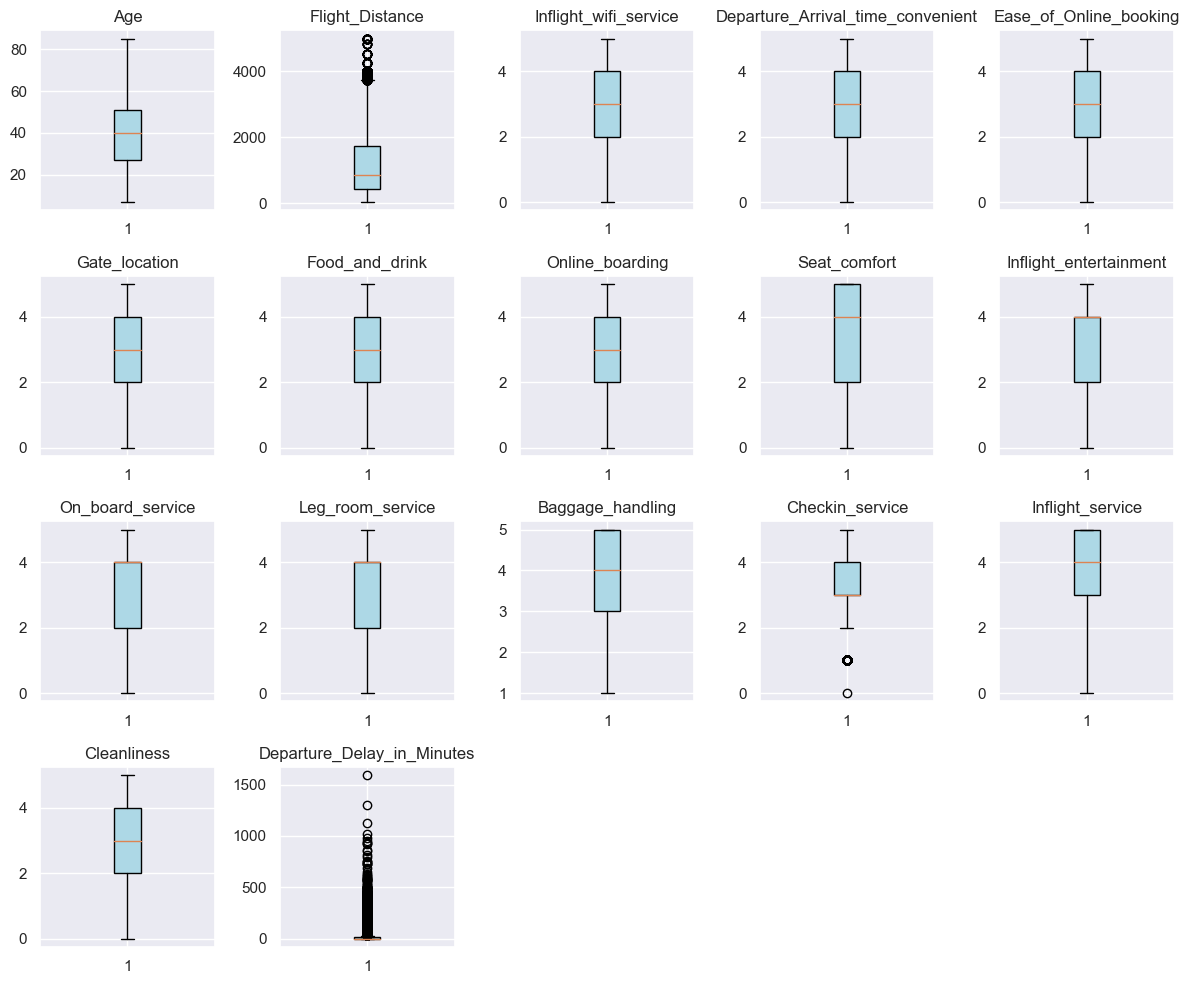

In [68]:
plt.figure(figsize=(12, 10))  

# Iterate over the numerical columns and create a box plot for each column
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)  
    plt.boxplot(df[column],patch_artist = True,
           boxprops = dict(facecolor = "lightblue"))
    plt.title(column)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [69]:
# There are outliers in columns ='Flight Distance',Checkin service

In [70]:
df.shape

(129487, 22)

In [71]:
#Removing outliers in Flight Distance column and dropping Checkin service

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    lower_array=np.array(df[column]<=lower_bound)
    upper_array=np.array(df[column]>=upper_bound)
    print("Lower Bound:",lower_bound)
    print('Lower outlier count for ',column,'is',lower_array.sum())
    print("Upper Bound:",upper_bound)
    print('Upper outlier count for ',column,'is',upper_array.sum())
    print("-"*30)
    # print(upper_bound)
    # print(lower_bound)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
df = remove_outliers(df, 'Flight_Distance')
df = remove_outliers(df, 'Checkin_service')


Lower Bound: -1581.0
Lower outlier count for  Flight_Distance is 0
Upper Bound: 3739.0
Upper outlier count for  Flight_Distance is 2856
------------------------------
Lower Bound: 1.5
Lower outlier count for  Checkin_service is 15790
Upper Bound: 5.5
Upper outlier count for  Checkin_service is 0
------------------------------


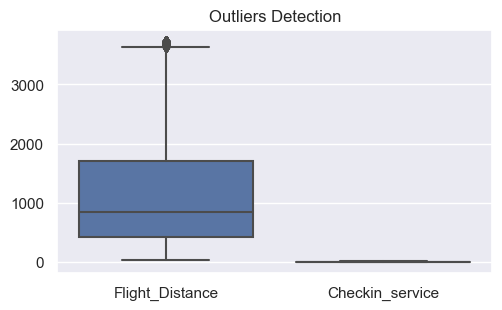

In [72]:
import seaborn as sns

columns_to_plot = ['Flight_Distance', 'Checkin_service']
plt.figure(figsize=(5, 3))
#sns.set(style="whitegrid")
sns.boxplot(data=df[columns_to_plot])
plt.title("Outliers Detection")
plt.show()

In [73]:
df.shape

(110850, 22)

# categorical columns conversion

In [74]:
catigorical_features


Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction'], dtype='object')

In [78]:
print(df['Class'])

0        Eco Plus
2        Business
4        Business
5             Eco
6             Eco
           ...   
25970         Eco
25971    Business
25972    Business
25973         Eco
25974    Business
Name: Class, Length: 110850, dtype: object


In [81]:
def CAT_CONV(df):
  df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
  df['Gender'].replace({'Male': 0, 'Female': 1},inplace = True)
  df['Customer_Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)
  df['Type_of_Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)
  df['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2},inplace = True)
 # df[['Age', 'Flight_Distance']].describe() #, 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']].describe()


In [82]:
CAT_CONV(df)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110850 entries, 0 to 25974
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Gender                             110850 non-null  int64
 1   Customer_Type                      110850 non-null  int64
 2   Age                                110850 non-null  int64
 3   Type_of_Travel                     110850 non-null  int64
 4   Class                              110850 non-null  int64
 5   Flight_Distance                    110850 non-null  int64
 6   Inflight_wifi_service              110850 non-null  int64
 7   Departure_Arrival_time_convenient  110850 non-null  int64
 8   Ease_of_Online_booking             110850 non-null  int64
 9   Gate_location                      110850 non-null  int64
 10  Food_and_drink                     110850 non-null  int64
 11  Online_boarding                    110850 non-null  int64
 12  Sea

# Splitting the data into train and test


In [84]:
from sklearn.model_selection import train_test_split
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

In [42]:
# Printing all independant ccolumns
print(X.columns)
len(X.columns)

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness'],
      dtype='object')


20

In [43]:
# Printing all independant ccolumns
#print(y)
len(y)

110850

In [44]:
import pickle
#pickle.dump(preprocessor, open('preprocess.pkl', 'wb'))

# open a file, where you ant to store the data
file = open('preprocess.pkl', 'wb')

# dump information to that file
pickle.dump(df, file)

# close the file
file.close()

In [45]:
df.shape

(110850, 21)

In [49]:
# separate dataset into train and test
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((83137, 20), (27713, 20))

In [272]:
! pip install xgboost

     -------------------------------------- 125.4/125.4 MB 3.7 MB/s eta 0:00:00


In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [51]:
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "Logistic Regression": LogisticRegression(),
 }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall


    print("\033[1m"+list(models.keys())[i]+"\033[0m")
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9632
- F1 score: 0.9631
- Precision: 0.9738
- Recall: 0.9448


XGBClassifier
Model performance for Training set
- Accuracy: 0.9752
- F1 score: 0.9752
- Precision: 0.9842
- Recall: 0.9607
----------------------------------
Model performance for Test set
- Accuracy: 0.9633
- F1 score: 0.9633
- Precision: 0.9714
- Recall: 0.9477


Logistic Regression
Model performance for Training set
- Accuracy: 0.8128
- F1 score: 0.8131
- Precision: 0.7749
- Recall: 0.8273
----------------------------------
Model performance for Test set
- Accuracy: 0.8124
- F1 score: 0.8128
- Precision: 0.7762
- Recall: 0.8288




# Hyper Parameter Tuning¶

In [52]:
#knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

LR_params={ "class_weight":['balanced'],
       'penalty':['l1','l2'],
       'C':[0.001,0.01,0.1,1,10,100],
        'solver':['liblinear','saga']
     }


In [53]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                   ('XGBoost', XGBClassifier(), xgboost_params),
                    ('LR',LogisticRegression(),LR_params)
                   
                   ]

In [55]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    rf_random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=10,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    rf_random.fit(X_train, y_train)
    model_param[name] = rf_random. best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
---------------- Best Params for LR -------------------
{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 1}


# Models Re-Trained with Best Parameters¶

In [60]:
from sklearn.metrics import roc_auc_score,roc_curve
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features= 5, max_depth= None),
    "XGBClassifier": XGBClassifier(n_estimators= 300, max_depth= 8, learning_rate= 0.1, colsample_bytree= 0.5, n_jobs=-1), 
    "LogisticRegression":LogisticRegression(class_weight='balanced',penalty='l1',C=1,solver='liblinear')
   
   }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc



    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9636
- F1 score: 0.9635
- Precision: 0.9748
- Recall: 0.9448
- Roc Auc Score: 0.9621


XGBClassifier
Model performance for Training set
- Accuracy: 0.9858
- F1 score: 0.9858
- Precision: 0.9922
- Recall: 0.9764
- Roc Auc Score: 0.9850
----------------------------------
Model performance for Test set
- Accuracy: 0.9645
- F1 score: 0.9645
- Precision: 0.9731
- Recall: 0.9486
- Roc Auc Score: 0.9633


LogisticRegression
Model performance for Training set
- Accuracy: 0.8731
- F1 score: 0.8732
- Precision: 0.8587
- Recall: 0.8620
- Roc Auc Score: 0.8722
----------------------------------
Model performance for Test set
- Accuracy: 0.8734
- F1 score: 0.8734
- Precision: 0.8608
- Recall: 0.8627
- Roc Auc Score: 0.8726




<Figure size 1500x1500 with 0 Axes>

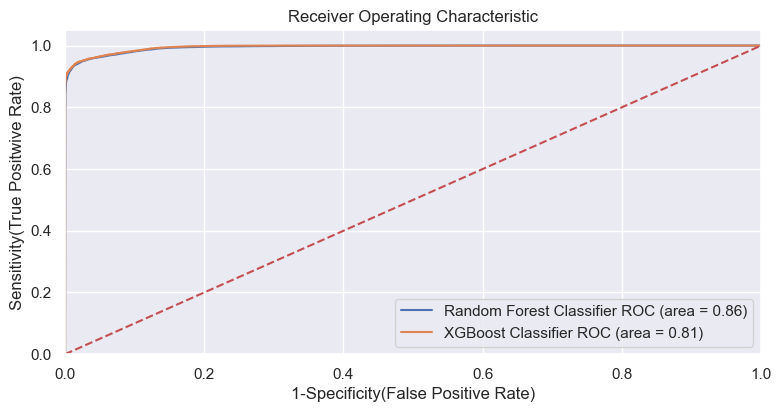

In [78]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()
plt.figure(figsize=(8, 4))
# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features= 'auto', max_depth= None),
    'auc': 0.8618
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(n_estimators= 200, max_depth= 20, learning_rate= 0.1, colsample_bytree= 0.8, n_jobs=-1),
    'auc': 0.8073
},
   
]

# Below for loop iterates through your models list
for m in auc_models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], m['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positwive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig(r"./images/roc_auc/auc.png")
plt.show()   # Display

In [62]:
best_xgb = XGBClassifier(n_estimators= 300, max_depth= 8, learning_rate= 0.1, colsample_bytree= 0.5, n_jobs=-1)
#'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
best_xgb = best_xgb.fit(X_train,y_train)
xgb_pred = best_xgb.predict(X_test)
score = accuracy_score(y_test,xgb_pred)
cr = classification_report(y_test,xgb_pred)

print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL XGB
Accuracy Score value: 0.9645
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15041
           1       0.97      0.95      0.96     12672

    accuracy                           0.96     27713
   macro avg       0.97      0.96      0.96     27713
weighted avg       0.96      0.96      0.96     27713



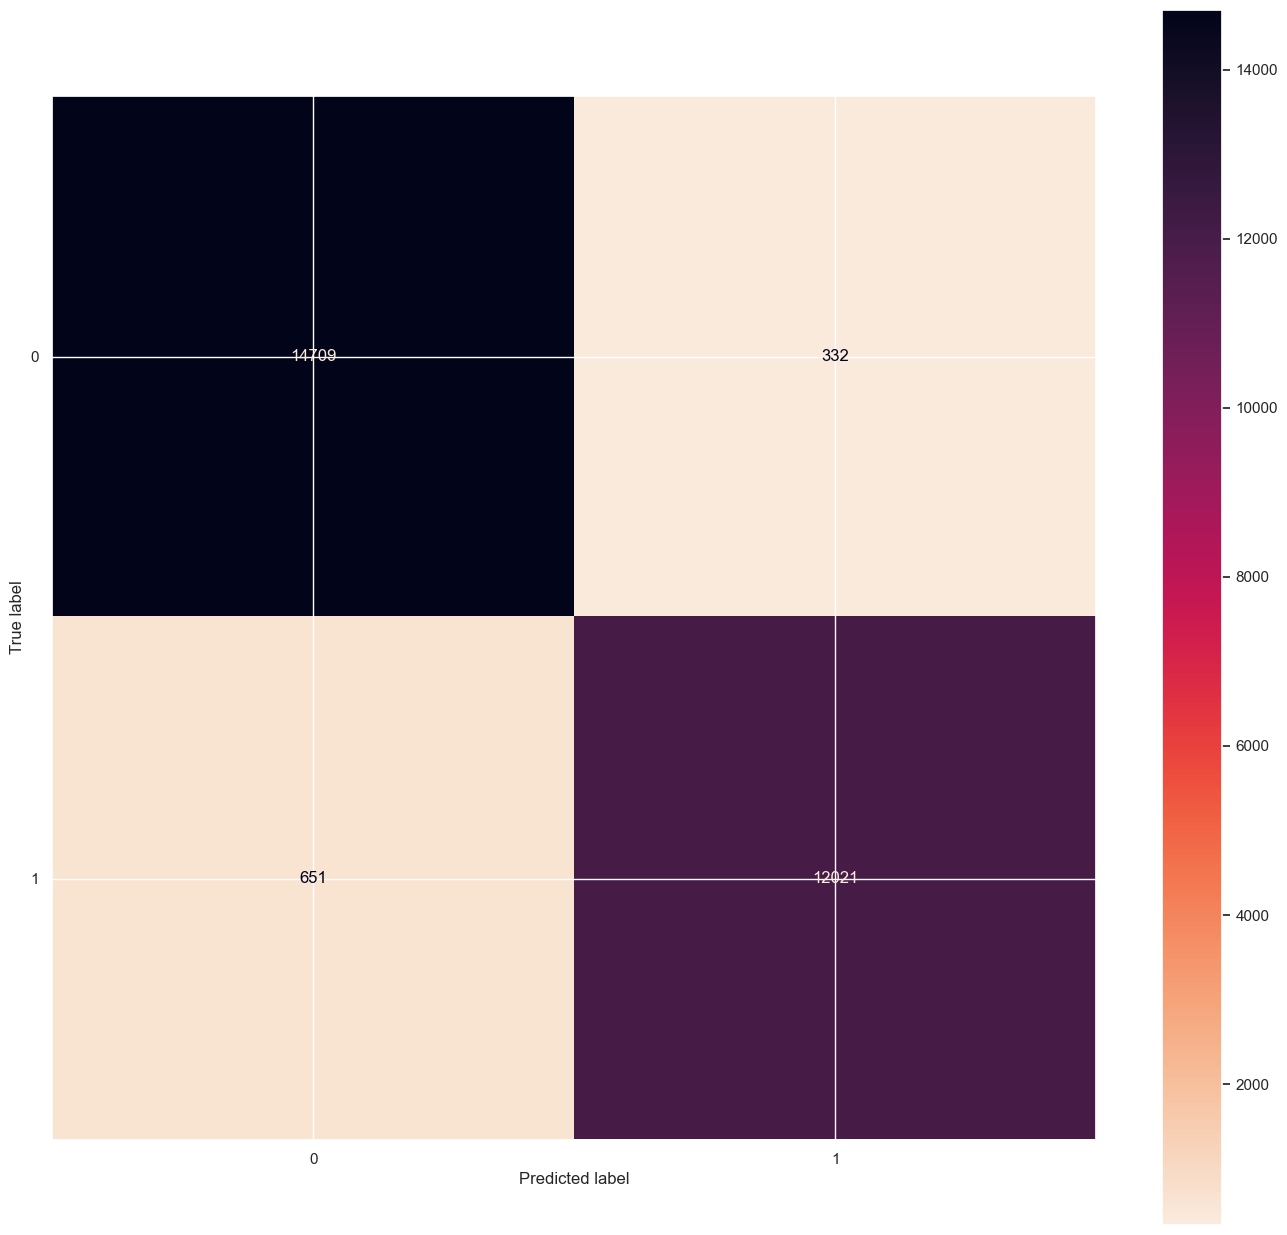

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test,cmap='rocket_r',  colorbar=True,)
plt.show()


In [ ]:
import pickle
 
# Save the trained model as a pickle file.
pickle.dump(best_xgb, open('classificationmodelXGB.pkl', 'wb'))